## Nobel Prize Dataset
---

In [1]:


import pandas as pd
import plotly.express as px
from matplotlib.lines import lineStyles

In [2]:
df = pd.read_csv("nobel_prize_data.csv")

df.sample(5)

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
727,2001,Medicine,The Nobel Prize in Physiology or Medicine 2001,"""for their discoveries of key regulators of th...",1/3,Individual,Sir Paul M. Nurse,1949-01-25,Norwich,United Kingdom,United Kingdom,Male,Imperial Cancer Research Fund,London,United Kingdom,GBR
393,1969,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having developed and applied dynamic mode...",1/2,Individual,Jan Tinbergen,1903-04-12,the Hague,Netherlands,Netherlands,Male,The Netherlands School of Economics,Rotterdam,Netherlands,NLD
217,1945,Chemistry,The Nobel Prize in Chemistry 1945,"""for his research and inventions in agricultur...",1/1,Individual,Artturi Ilmari Virtanen,1895-01-15,Helsinki,Russian Empire (Finland),Finland,Male,University of Helsinki,Helsinki,Finland,FIN
96,1919,Physics,The Nobel Prize in Physics 1919,"""for his discovery of the Doppler effect in ca...",1/1,Individual,Johannes Stark,1874-04-15,Schickenhof,Germany,Germany,Male,Greifswald University,Greifswald,Germany,DEU
835,2010,Literature,The Nobel Prize in Literature 2010,"""for his cartography of structures of power an...",1/1,Individual,Mario Vargas Llosa,1936-03-28,Arequipa,Peru,Peru,Male,NaN,NaN,NaN,PER


### Initial checks( Pandas)
---

In [3]:
### Get an understanding of the dataset
df.shape            # 962 by 16
df.head()           # 1901 is the earliest
df.tail()           # 2020 is the latest date
df.columns          # Need to adjust
df.dtypes           # Year needs to be adjusted + prize share as well
df.isna().sum()     # There are missing values in some categories, not the first ones
                    ## More likely for the latter categories --> Mainly for more complicated variables.
df.duplicated(keep= False).sum()        # There are no duplicated values
df.columns          # Some columns need to be removed


Index(['year', 'category', 'prize', 'motivation', 'prize_share',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'birth_country_current', 'sex', 'organization_name',
       'organization_city', 'organization_country', 'ISO'],
      dtype='object')

In [4]:
## Adjustments from the earlier analysis:

#### Keep the columns+ Change the names to make it easier to access
df.rename(columns= {'year': "Year",
                    'category':"Category",
                    'prize': "Prize",
                    'motivation':" Motivation",
                    'prize_share':"Prize_Share",
                    'laureate_type':"Laureate_Type",
                    'full_name' :"Full_Name",
                    'birth_date':"Birth_Date",
                    'birth_city':"Birth_City",
                    'birth_country':"Birth_Country",
                    'birth_country_current':"Birth Country_Current",
                    'sex':"Sex",
                    'organization_name':"Organization_Name",
                    'organization_city':"Organisation_City",
                    'organization_country':"Organisation_Country",
                    'ISO':"ISO"}, inplace=True)


df["Year"] = pd.to_datetime(df["Year"].astype(str), format="%Y")



values = df["Prize_Share"].str.split("/", expand=True)      # Split the values horizontally
numerator= pd.to_numeric(values[0])
denominator= pd.to_numeric(values[1])
share_pct:float                                             # assignment of float
share_pct =numerator/denominator
df["Share_Pct"] =share_pct                                  # Saved into a new column.
#
df.head()


,Year,Category,Prize,Motivation,Prize_Share,Laureate_Type,Full_Name,Birth_Date,Birth_City,Birth_Country,Birth Country_Current,Sex,Organization_Name,Organisation_City,Organisation_Country,ISO,Share_Pct
0,1901-01-01,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD,1.0
1,1901-01-01,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA,1.0
2,1901-01-01,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL,1.0
3,1901-01-01,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN,FRA,0.5
4,1901-01-01,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE,0.5


### Visualisation( Plotly)
---


Create a donut chart using plotly which shows how many prizes went to men compared to how many prizes went to women. What percentage of all the prizes went to women?

In [5]:
men_and_women  = df["Sex"].value_counts()
print(men_and_women)

fig = px.pie(names =men_and_women.index, values = men_and_women.values, title =" Number of Nobel Laureates by Sex", hole= 0.6)
fig.update_traces(textposition="outside", textinfo="percent+label")
fig.show()

Sex
Male      876
Female     58
Name: count, dtype: int64


What are the names of the first 3 female Nobel laureates?

What did the win the prize for?

What do you see in their birth_country? Were they part of an organisation?



In [6]:
# Names of the first three nobel laureates
first_female_laureates = df[df["Sex"]=="Female"].sort_values(by = "Year" , ascending=True )[:5]
first_female_laureates["Category"]          # Shows the categories of the topics
first_female_laureates["Birth_Country"]     # Shows their brith countries
first_female_laureates["Organization_Name"]

18                     NaN
29                     NaN
51                     NaN
62     Sorbonne University
128                    NaN
Name: Organization_Name, dtype: object


Did some people get a Nobel Prize more than once? If so, who were they?

In [7]:
duplicated = df[["Full_Name", "Birth_Date"]].duplicated(keep = False)           # Returns a boolean. Feed the boolean back inot thethe df function and then do sort values
df[duplicated].sort_values("Full_Name", ascending = False)["Full_Name"].nunique()           # 6 unique people won twice
names = df[duplicated]["Full_Name"].unique()   # Pulls the number of unique names:
final_names = names.tolist()
print(f"There were 6 multiple winners of the Nobel Prize. ")
for name in names:
    print(" -", name)


There were 6 multiple winners of the Nobel Prize. 
 - Marie Curie, née Sklodowska
 - Comité international de la Croix Rouge (International Committee of the Red Cross)
 - Linus Carl Pauling
 - Office of the United Nations High Commissioner for Refugees (UNHCR)
 - John Bardeen
 - Frederick Sanger


In how many categories are prizes awarded?

Create a plotly bar chart with the number of prizes awarded by category.

Use the color scale called Aggrnyl to colour the chart, but don't show a color axis.

Which category has the most number of prizes awarded?

Which category has the fewest number of prizes awarded?

In [8]:
df["Category"].nunique()            # There are siz categories

#----------------------------------------Number of Prizes by Cateogory ------------------------------#
categories_prizes = df["Category"].value_counts()
chart= px.bar( x= categories_prizes.index,
               y=  categories_prizes.values,
               title=" Nobel Prizes by Category",
               labels = {"x": "Categories", "y": "Prizes"},
               color_continuous_scale="Aggrnyl",
               color = categories_prizes.values,
               )
chart.update_layout(coloraxis_showscale=True)
chart.show()

            # Largest number of Prizes in Medicine and smallest is in Economics.

When was the first prize in the field of Economics awarded?

Who did the prize go to?

In [9]:
economics_subset = df[df["Category"]== "Economics"].sort_values(by = "Year" , ascending=True )
first_economics_prize = economics_subset.iloc[0,:]              # First position
economics_year = first_economics_prize["Year"]
economics_who = first_economics_prize["Full_Name"]
print(f"The first economics prize went to { economics_who} in {economics_year}.")


The first economics prize went to Jan Tinbergen in 1969-01-01 00:00:00.


Create a plotly bar chart that shows the split between men and women by category.

In [10]:
    # This produces a series weith multi index
dataset = df[["Sex", "Category"]].value_counts().reset_index()


            ## Can also use group by to get the same thing. Use this when you want more control- group by more things etc

cat_men_women = df.groupby(['Category', 'Sex'],as_index=False).agg({'Prize': pd.Series.count})
cat_men_women.sort_values('Prize', ascending=False, inplace=True)
cat_men_women

,Category,Sex,Prize
11,Physics,Male,212
7,Medicine,Male,210
1,Chemistry,Male,179
5,Literature,Male,101
9,Peace,Male,90
3,Economics,Male,84
8,Peace,Female,17
4,Literature,Female,16
6,Medicine,Female,12
0,Chemistry,Female,7


In [11]:
    # Name is the bale that appears in the neged.
    ## Best to split them by categories into different datasets into different forms. Same with the pri charts.


import plotly.graph_objects as go
male= dataset[dataset["Sex"]=="Male"]
female= dataset[dataset["Sex"]=="Female"]

fig = go.Figure(data=[
    go.Bar(name="Male", x=male["Category"], y=male["count"]),
    go.Bar(name="Female", x=female["Category"], y=female["count"])
])
# Change the bar mode
fig.update_layout(barmode='group',
                  title="Nobel Laureates by Gender",
                  )

fig.update_xaxes(title_text="Subject")

# Optional: Change Y-axis label too
fig.update_yaxes(title_text="Number of Nobel Laureates")

fig.show()


### Using Matplotlib to Visualise Trends over Time
---

#### Challenge 1
----

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates

Are more prizes awarded recently than when the prize was first created? Show the trend in awards visually.

Count the number of prizes awarded every year.



In [13]:
prizes_per_year = df.groupby("Year").agg({"Prize":"count"})
     # Conversion type was wrong. So need to ocnvert it
prizes_per_year = prizes_per_year.sort_values("Year")
prizes_per_year= prizes_per_year.reset_index()
prizes_per_year
# prizes_per_year["Year"]= pd.to_datetime(prizes_per_year["Year"].astype(str), format="%Y")
prizes_per_year["Moving"] = prizes_per_year["Prize"].rolling(window = 5).mean()
prizes_per_year.tail()

,Year,Prize,Moving
112,2016-01-01,11,11.6
113,2017-01-01,12,12.0
114,2018-01-01,13,12.0
115,2019-01-01,14,12.2
116,2020-01-01,12,12.4


Create a 5 year rolling average of the number of prizes (Hint: see previous lessons analysing Google Trends).

Using Matplotlib superimpose the rolling average on a scatter plot.

Show a tick mark on the x-axis for every 5 years from 1900 to 2020. (Hint: you'll need to use NumPy).

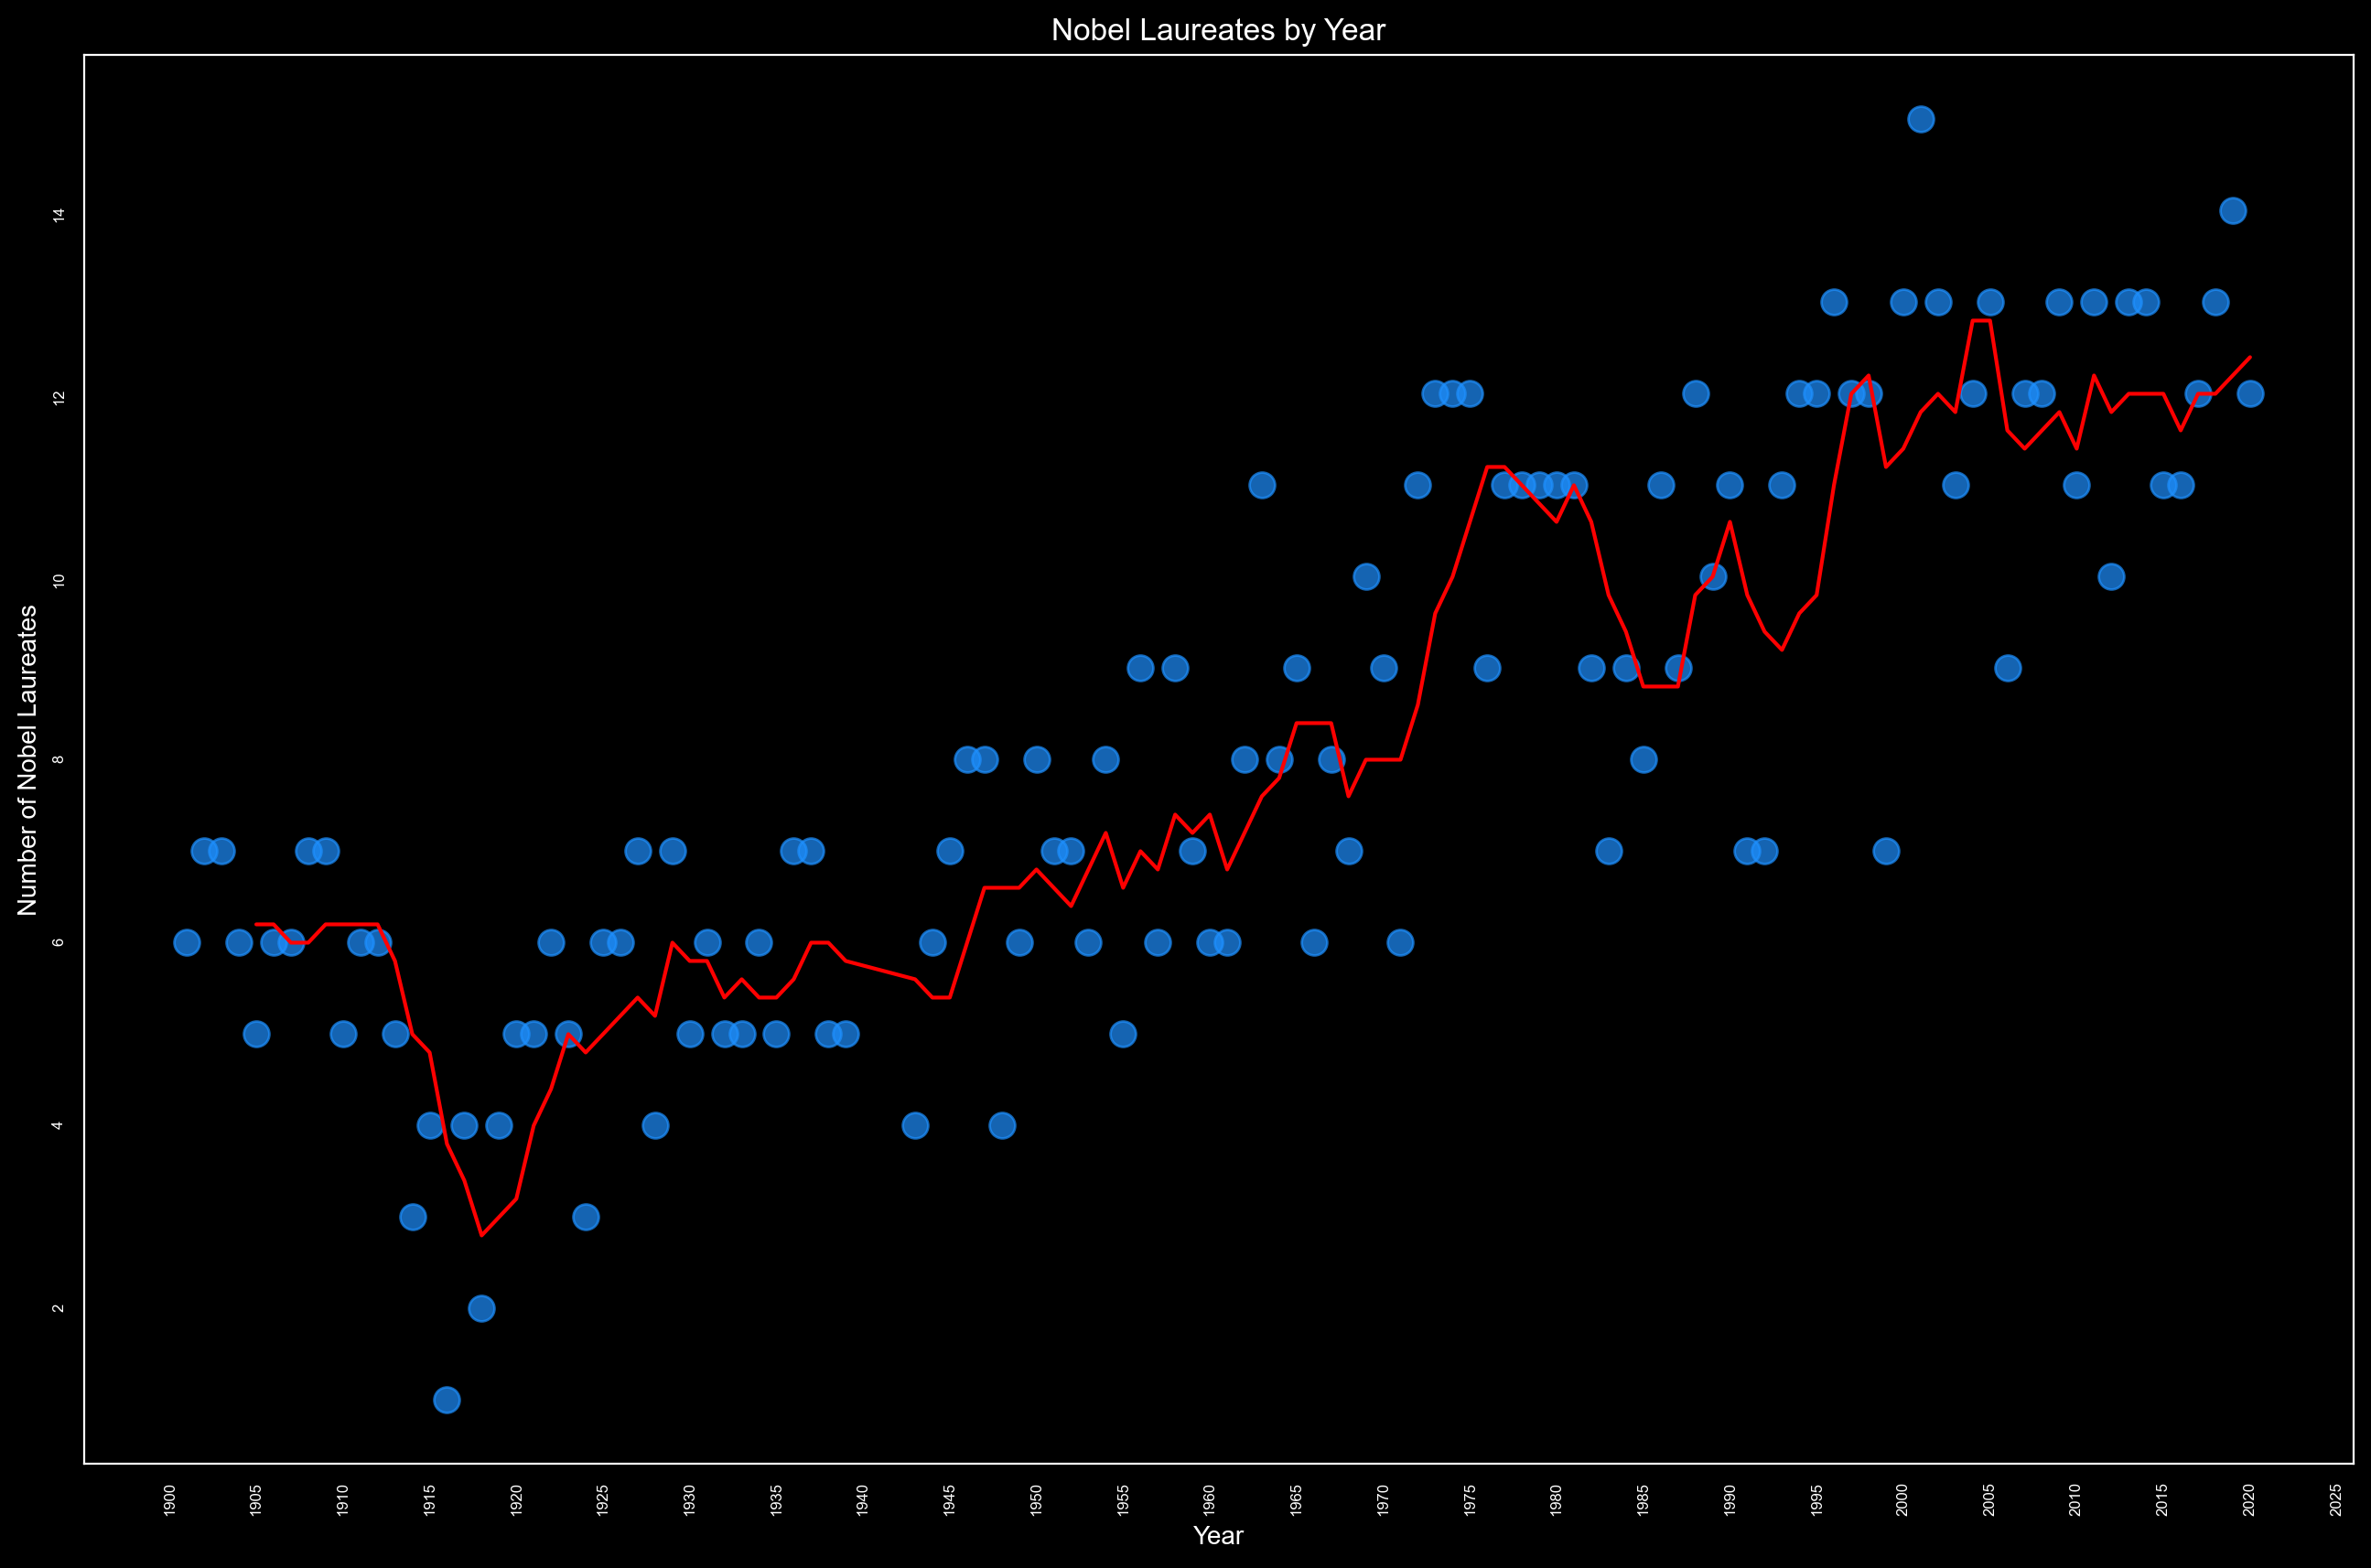

In [14]:
plt.figure(figsize = (16,10), dpi= 200)
# steps = np.arange(1900, 2020, 5)
plt.xticks( rotation = 90, fontsize = 6)                # add in ticks = steps if the year column is just numers
plt.yticks(rotation = 90, fontsize = 6)

plt.scatter(x =prizes_per_year["Year"],
                    y =prizes_per_year["Prize"],
                    linestyles = "-",
                    c='dodgerblue',
                   alpha=0.7,                   # Transparency of the points
                   s=100,)                      # Size of each point
plt.plot(prizes_per_year["Year"],
         prizes_per_year["Moving"],
         color = "red",)

ax1 =plt.gca()
## you coul;d also use mdates
year= mdates.YearLocator(base= 5)
years_FMT = mdates.DateFormatter('%Y')
ax1.xaxis.set_major_locator(year)
ax1.xaxis.set_major_formatter(years_FMT)

plt.xlabel("Year")
plt.ylabel("Number of Nobel Laureates")
plt.title("Nobel Laureates by Year")
plt.grid(False)

plt.show()


#### Challenge 2
----

Investigate if more prizes are shared than before.

Calculate the average prize share of the winners on a year by year basis.

Calculate the 5 year rolling average of the percentage share.

.

In [15]:
# Average Prize share on a year-on-year basis
average_sharer_per_year = df.groupby("Year").agg({"Share_Pct":"mean"}).reset_index()
average_sharer_per_year["Moving"] = average_sharer_per_year["Share_Pct"].rolling ( window =5).mean()

Copy-paste the cell from the chart you created above.

Modify the code to add a secondary axis to your Matplotlib chart.

Plot the rolling average of the prize share on this chart.

See if you can invert the secondary y-axis to make the relationship even more clear

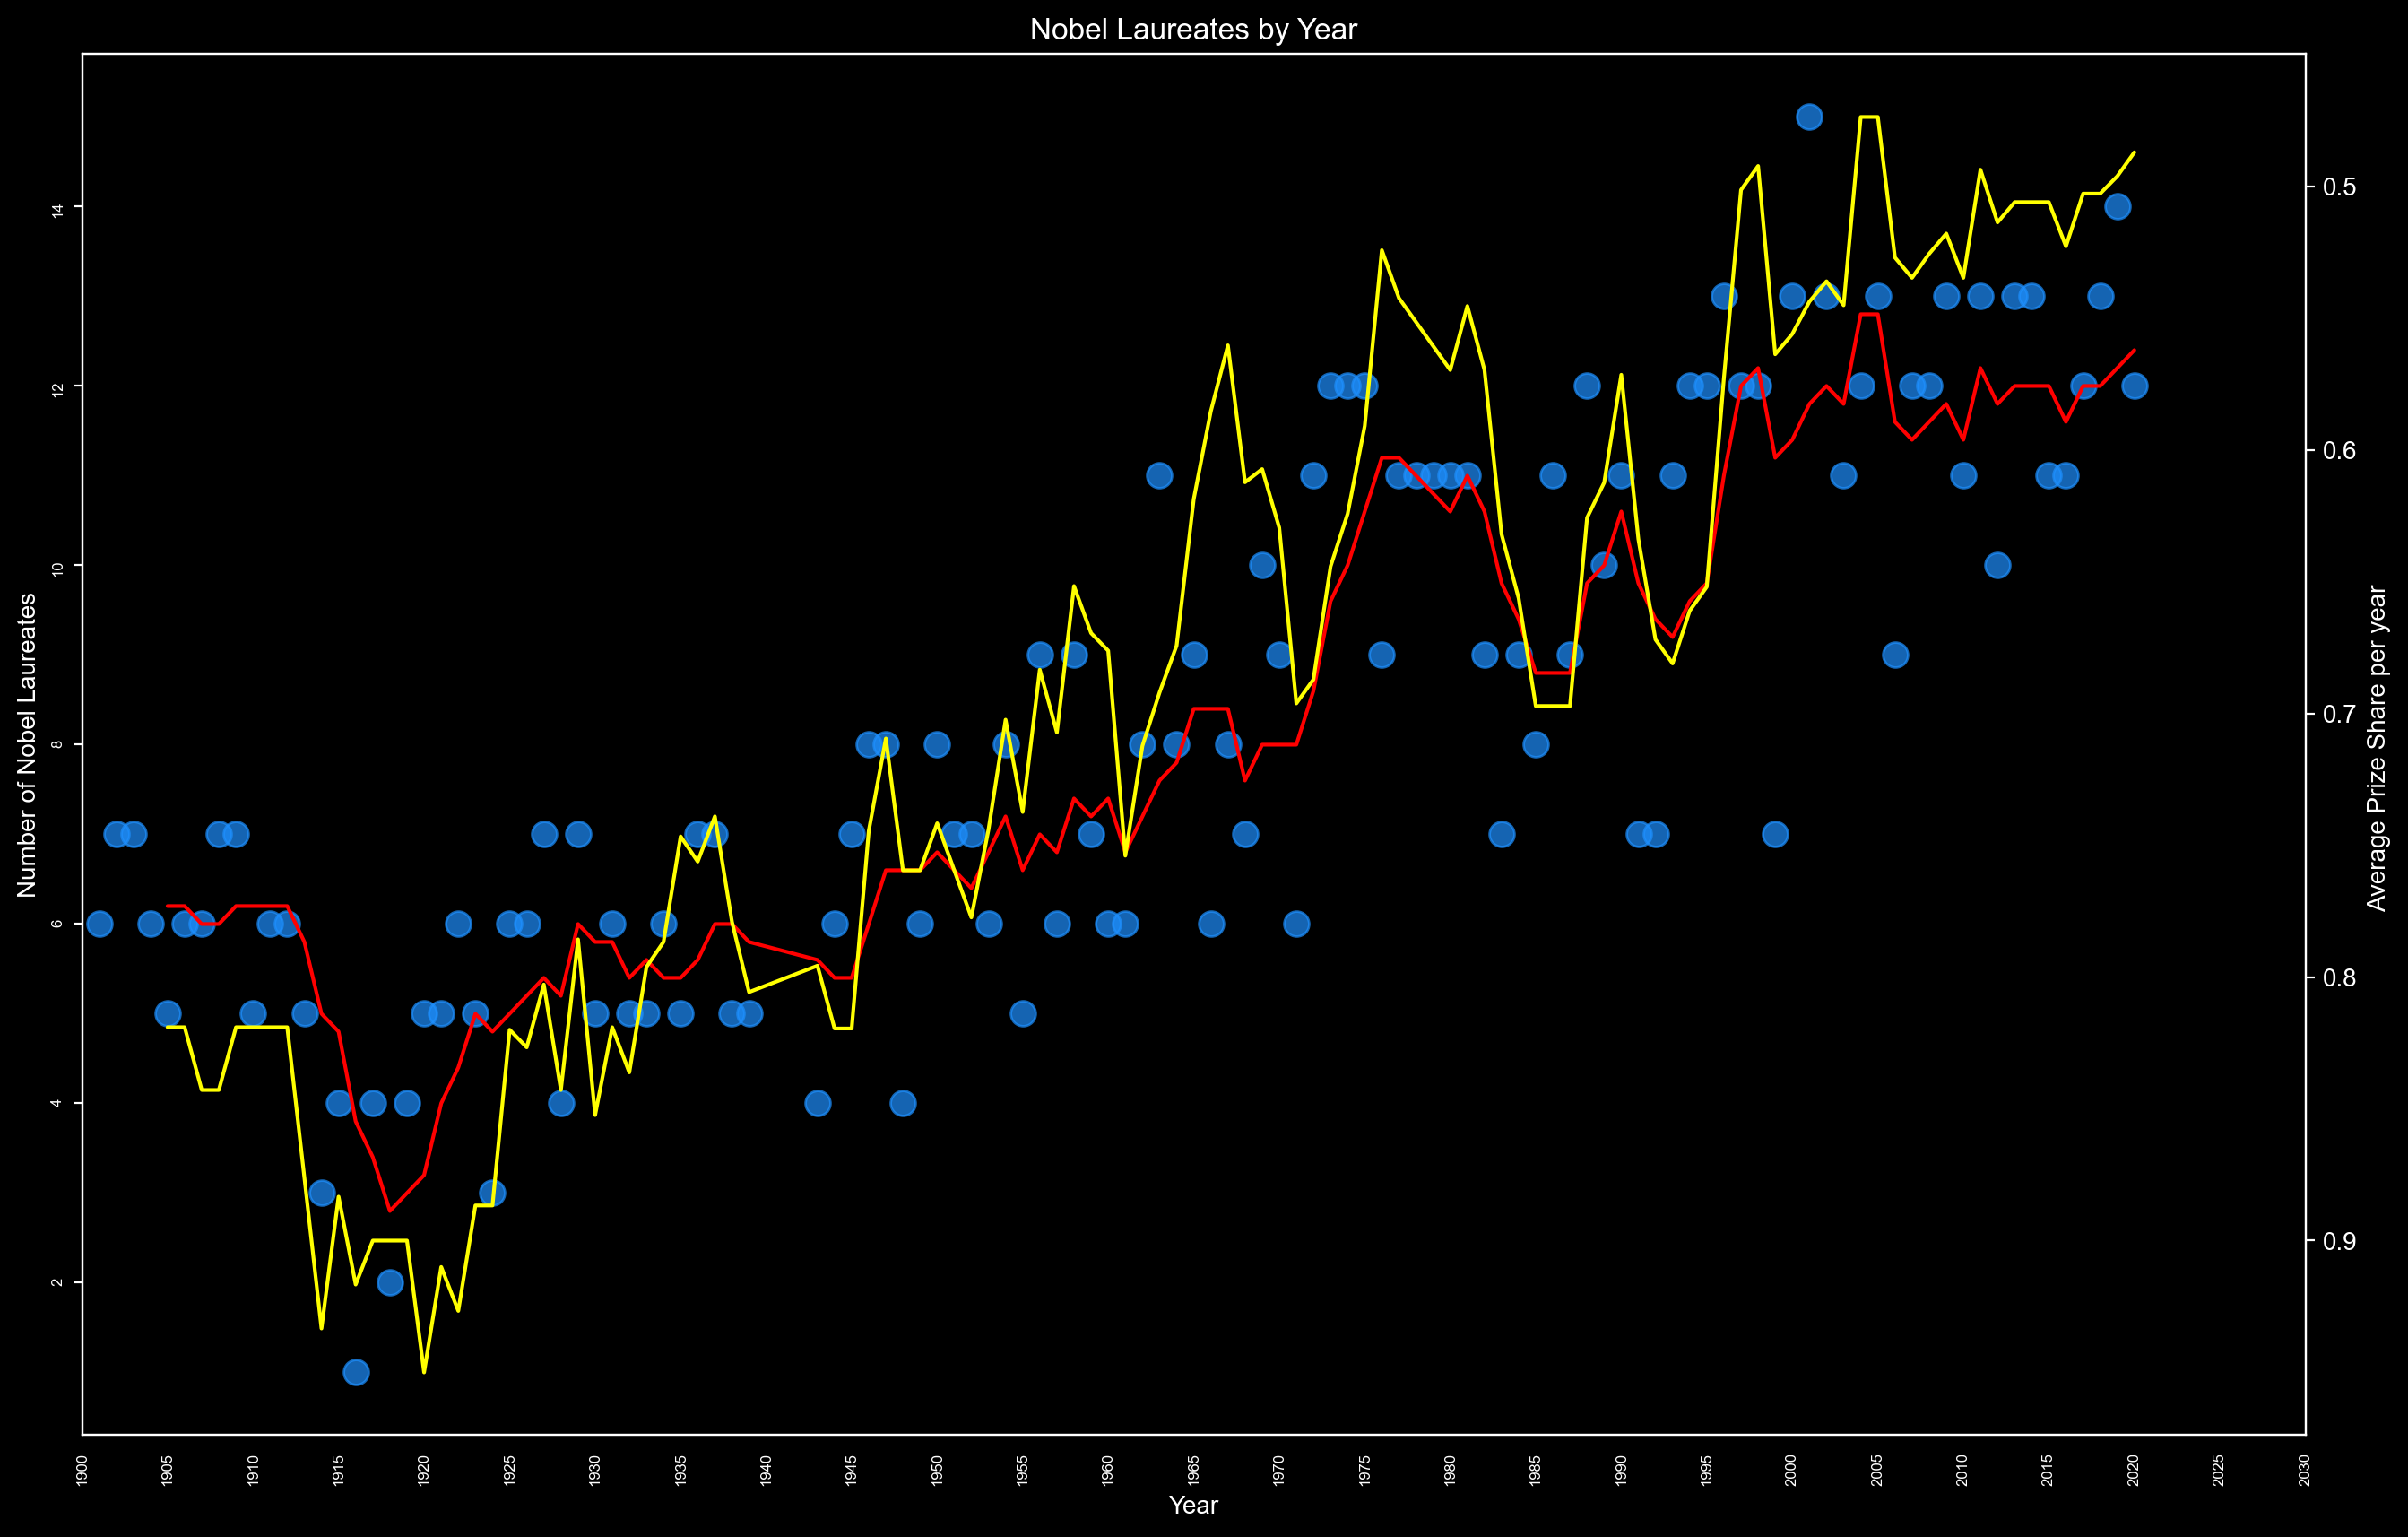

In [16]:
plt.figure(figsize = (16,10), dpi= 200)
# steps = np.arange(1900, 2020, 5)
plt.xticks( rotation = 90, fontsize = 6)                # add in ticks = steps if the year column is just numers
plt.yticks(rotation = 90, fontsize = 6)

#---------------------------------------------------------------#
ax1 =plt.gca()
ax2 =ax1.twinx()
## you coul;d also use mdates
year= mdates.YearLocator(base= 5)
years_FMT = mdates.DateFormatter('%Y')
ax1.xaxis.set_major_locator(year)
ax1.xaxis.set_major_formatter(years_FMT)


#---------------------------------------------------------------#
ax1.scatter(x =prizes_per_year["Year"],
                    y =prizes_per_year["Prize"],
                    linestyles = "-",
                    c='dodgerblue',
                   alpha=0.7,                   # Transparency of the points
                   s=100,)                      # Size of each point
ax1.plot(prizes_per_year["Year"],
         prizes_per_year["Moving"],
         color = "red",)

ax2.plot(average_sharer_per_year["Year"],
         average_sharer_per_year["Moving"],
         color = "yellow",)
#---------------------------------------------------------------#
ax1.set_xlabel("Year")
ax1.set_ylabel("Number of Nobel Laureates")
ax1.set_xlim(pd.to_datetime("1900"), pd.to_datetime("2030"))
plt.title("Nobel Laureates by Year")
ax2.set_ylabel("Average Prize Share per year ")
ax2.yaxis.set_inverted(True)                    # Invert the x or the y axis
ax2.grid(False)
ax1.grid(False)
plt.show()

### Plotly Visualisation
---

In [17]:
import plotly.express as px

#### Bar chart 

Create a Pandas DataFrame called top20_countries that has the two columns. The prize column should contain the total number of prizes won.



In [18]:
df["Birth_Country"]
top_countries = df.groupby("Birth_Country").agg({"Prize":"count"})      # Group them by birth countries
top_countries.sort_values(by ="Prize", ascending = False, inplace=True) # Highest first
top_countries= top_countries[:20]
top_countries


,Prize
Birth_Country,
United States of America,281
United Kingdom,91
Germany,65
France,54
Sweden,29
Japan,27
Canada,20
Switzerland,19
Netherlands,18


Then use plotly to create a horizontal bar chart showing the number of prizes won by each country.

In [19]:
h_bar = px.bar( x=  top_countries["Prize"],
                y= top_countries.index,
                color = top_countries["Prize"],
                color_continuous_scale=    "peach",
                orientation="h",
                labels ={"x":"Total Nobel Laureates", "y":"Prize"},
                title=" Number of Nobel Laureates by Country")
h_bar.update_coloraxes(showscale=False)                                         # Remove the scale
h_bar.show()

#### Choropleth Map

In [20]:
df["Birth_Country"]
top_countries = df.groupby("Birth_Country").agg({"Prize":"count"})      # Group them by birth countries
top_countries.sort_values(by ="Prize", ascending = False, inplace=True) # Highest first


In [21]:

fig = px.choropleth(top_countries,
                    locations = top_countries.index,
                    locationmode="country names",
                    color="Prize",
                    color_continuous_scale= "matter",
                    hover_name =top_countries.index,)

fig.update_layout(
    title_text='Number of Nobel Laureates per country',
   geo=dict(
        showframe=True,                                    # Removes the outer border
        showcoastlines=True,                               # Hides costlines outline
        projection_type="equirectangular"
    ),
    )
fig.show()

C:\Users\mathe\AppData\Local\Temp\ipykernel_11228\1619596557.py:1: DeprecationWarning:

The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `locationmode` to *ISO-3*.



#### Country Bar Chart with Prize Category

In [22]:
#### Create a pivot table with the country, category and values.

    # Country by category
country_number_type= df.groupby(["Birth_Country","Category"]).agg({"Prize":"count"}).reset_index()

    # Country by totals and ordered
totals =  df.groupby("Birth_Country").agg({"Prize":"count"})
totals.sort_values(by ="Prize", ascending = False, inplace=True)
list_countries = totals.head(5).index                                         # Getting the counties list of the top 10


    # Merging the two of them together
country_number_type = pd.merge(country_number_type, totals, on="Birth_Country", how="inner").sort_values("Prize_y", ascending=False)

country_number_type = country_number_type[country_number_type["Birth_Country"].isin(list_countries)]                # check if items in list
country_number_type



,Birth_Country,Category,Prize_x,Prize_y
259,United States of America,Physics,70,281
258,United States of America,Peace,19,281
256,United States of America,Literature,10,281
257,United States of America,Medicine,78,281
254,United States of America,Chemistry,55,281
255,United States of America,Economics,49,281
252,United Kingdom,Peace,5,91
253,United Kingdom,Physics,23,91
250,United Kingdom,Literature,6,91
251,United Kingdom,Medicine,25,91


In [23]:
""### Create the Bar chart
    ## Cannot directly apply the countr data. Need to make it vertical using


fig = px.bar( country_number_type ,
             y= "Birth_Country",
             x= "Prize_x",
             color= "Category",
             barmode="stack",
             orientation="h")

fig.show()

Every country's fortunes wax and wane over time. Investigate how the total number of prizes awarded changed over the years.

When did the United States eclipse every other country in terms of the number of prizes won?

Which country or countries were leading previously?

Calculate the cumulative number of prizes won by each country in every year. Again, use the birth_country_current of the winner to calculate this.

Create a plotly line chart where each country is a coloured line

In [24]:
### Converthing to a datetime module safely

df["Year"].astype(str)
df["Year"] = pd.to_datetime(df["Year"],format ="%Y" , errors="coerce")    # Errors= coerce will stop it falling back otn unix time, then you can saefely extrac the date time and month using
                                                                    ## df["YearOnly"] = df["Year"].dt.year
                                                                    ## df["Month"] = df["Year"].dt.month
                                                                    ## df["Day"] = df["Year"].dt.day

df["Year"]= df["Year"].dt.year
df

,Year,Category,Prize,Motivation,Prize_Share,Laureate_Type,Full_Name,Birth_Date,Birth_City,Birth_Country,Birth Country_Current,Sex,Organization_Name,Organisation_City,Organisation_Country,ISO,Share_Pct
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD,1.000000
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA,1.000000
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL,1.000000
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN,FRA,0.500000
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
957,2020,Medicine,The Nobel Prize in Physiology or Medicine 2020,“for the discovery of Hepatitis C virus”,1/3,Individual,Michael Houghton,1949-07-02,NaN,United Kingdom,United Kingdom,Male,University of Alberta,Edmonton,Canada,GBR,0.333333
958,2020,Peace,The Nobel Peace Prize 2020,"“for its efforts to combat hunger, for its con...",1/1,Organization,World Food Programme (WFP),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
959,2020,Physics,The Nobel Prize in Physics 2020,“for the discovery of a supermassive compact o...,1/4,Individual,Andrea Ghez,1965-06-16,"New York, NY",United States of America,United States of America,Female,University of California,"Berkeley, CA",United States of America,USA,0.250000
960,2020,Physics,The Nobel Prize in Physics 2020,“for the discovery of a supermassive compact o...,1/4,Individual,Reinhard Genzel,1952-03-24,Bad Homburg vor der Höhe,Germany,Germany,Male,University of California,"Los Angeles, CA",United States of America,DEU,0.250000


In [25]:
# Getting the data correctly


## pIVOT TBALES FIRTST COLLATE THE DATA SO STRINGS CANNOT BE COLLATED INTO AN ARRAY,T HEN APPLY FUNCTION. sO CANNOT COLLATE STRINGS
reshaped_df =  df.pivot_table(index ="Year", columns="Birth_Country", values="Share_Pct", aggfunc="count")
reshaped_df = reshaped_df[list_countries]
reshaped_df.fillna(0, inplace = True)
# to get the cumualrttive sum use cium sum()
reshaped_df = reshaped_df.cumsum()



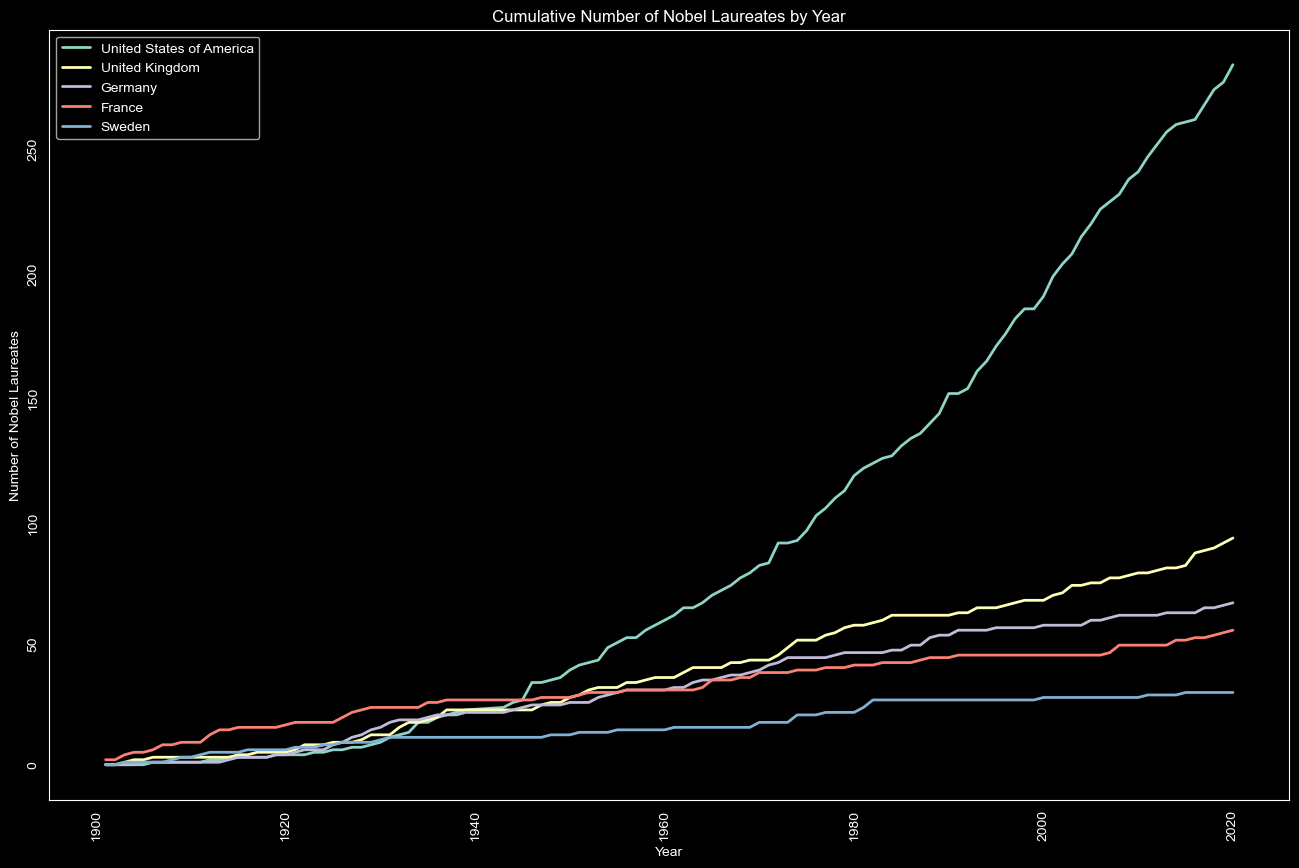

In [26]:
## Graph
plt.figure(figsize = (16,10))
plt.xticks(rotation = 90, fontsize = 10)
plt.yticks(rotation = 90, fontsize = 10)



for column in reshaped_df:
    chart =plt.plot(reshaped_df.index,
                    reshaped_df[column],
                    label = reshaped_df[column].name,
                    linewidth = 2,
                    linestyle = "-")

plt.xlabel("Year")
plt.ylabel("Number of Nobel Laureates")
plt.title("Cumulative Number of Nobel Laureates by Year")
plt.grid(False)
plt.legend()


In [27]:
for columns in reshaped_df:
    print(reshaped_df[columns])

Year
1901      0.0
1902      0.0
1903      0.0
1904      0.0
1905      0.0
        ...  
2016    259.0
2017    265.0
2018    271.0
2019    274.0
2020    281.0
Name: United States of America, Length: 117, dtype: float64
Year
1901     0.0
1902     0.0
1903     1.0
1904     2.0
1905     2.0
        ... 
2016    85.0
2017    86.0
2018    87.0
2019    89.0
2020    91.0
Name: United Kingdom, Length: 117, dtype: float64
Year
1901     0.0
1902     0.0
1903     0.0
1904     0.0
1905     1.0
        ... 
2016    61.0
2017    63.0
2018    63.0
2019    64.0
2020    65.0
Name: Germany, Length: 117, dtype: float64
Year
1901     2.0
1902     2.0
1903     4.0
1904     5.0
1905     5.0
        ... 
2016    51.0
2017    51.0
2018    52.0
2019    53.0
2020    54.0
Name: France, Length: 117, dtype: float64
Year
1901     0.0
1902     0.0
1903     1.0
1904     1.0
1905     1.0
        ... 
2016    29.0
2017    29.0
2018    29.0
2019    29.0
2020    29.0
Name: Sweden, Length: 117, dtype: float64


In [28]:
for columns in reshaped_df:
    print(reshaped_df[columns].name)

United States of America
United Kingdom
Germany
France
Sweden


#### Sunburst Chart

##### Challenge 1

In [38]:
## Cleaning and shaping the dataset to be used.
organisation_df = df.groupby("Organization_Name").agg({"Prize":"count"})
organisation_df.sort_values(by ="Prize", ascending = False, inplace=True)#
organisation_df

,Prize
Organization_Name,
University of California,40
Harvard University,29
Stanford University,23
Massachusetts Institute of Technology (MIT),21
University of Chicago,20
...,...
University of Missouri,1
"University of Nottingham, School of Physics and Astronomy",1
University of Rochester,1


In [42]:
## Creating the diagram
chart =px.bar(x = organisation_df["Prize"][:20],
              y= organisation_df.index[:20],
              orientation = "h",
              title =" Top 20 research institutions by Number of Prizes",
              labels  = {"x": "Number of Prizes", "y":"Institution"},
              color = organisation_df["Prize"][:20],)
chart.update_layout(coloraxis_showscale=False)
chart.show()